In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Imported essential libraries such as pandas, numpy, and various visualization tools that are foundational for data manipulation, visualization, and analysis.

In [97]:
data = pd.read_csv('/Users/ilya/Desktop/GitHub_Repositories/DataSets/Transactions.csv')

Following the initial preprocessing steps, the dataset's dimensions were noticeably reduced from their original size. This reduction signifies that a notable fraction of the dataset was either redundant or contained missing values. The decision to remove certain columns, such as `transaction_id`, was pivotal in ensuring the dataset's relevancy for subsequent analyses.

In [98]:
data.head()

transaction_id  procedure_id  trans_group_id trans_group_ar trans_group_en  \
0  1-11-2001-165            11               1        مبايعات          Sales   
1   3-9-2004-223             9               3           هبات          Gifts   
2  2-13-1996-119            13               2           رهون      Mortgages   
3  2-14-2005-222            14               2           رهون      Mortgages   
4   3-9-2012-874             9               3           هبات          Gifts   

  procedure_name_ar      procedure_name_en instance_date  property_type_id  \
0               بيع                   Sell    24-02-2001                 1   
1               هبه                  Grant    13-12-2004                 4   
2         تسجيل رهن  Mortgage Registration    12-03-2001                 1   
3         تعديل رهن        Modify Mortgage    20-09-2005                 2   
4               هبه                  Grant    11-10-2012                 4   

  property_type_ar  ... rooms_en  has_parking procedure_area actual_worth  \
0              أرض  ...      NaN            0        1393.55    1350000.0   
1             فيلا  ...      NaN            0        1728.00    2790000.0   
2              أرض  ...      NaN            0         929.03   20000000.0   
3             مبنى  ...      NaN            0        2673.28   25000000.0   
4             فيلا  ...      NaN            0        1541.17    9000000.0   

  meter_sale_price rent_value  meter_rent_price no_of_parties_role_1  \
0           968.75        NaN               NaN                  1.0   
1          1614.58        NaN               NaN                  1.0   
2         21527.83        NaN               NaN                  1.0   
3          9351.81        NaN               NaN                  1.0   
4          5839.72        NaN               NaN                  1.0   

  no_of_parties_role_2  no_of_parties_role_3  
0                  1.0                   0.0  
1                  1.0                   0.0  
2                  1.0                   0.0  
3                  1.0                   0.0  
4                  1.0                   0.0  

[5 rows x 46 columns]

### Previewed the initial rows of the dataset to obtain a brief overview of the available features and their corresponding data entries.

In [99]:
data = data.drop('transaction_id', axis=1)

In [100]:
data.shape

(1047965, 45)

### The dataset underwent further refinement with the removal of columns in Arabic. This step was essential to avoid potential multicollinearity which could skew any predictive models. Retaining data in one language has ensured a more straightforward and streamlined analysis process.

In [101]:
data = data.loc[:,~data.columns.str.contains('_ar')]

### As we can see there were 15 almost the same columns

In [102]:
data.shape

(1047965, 30)

### Now we should understand is there any missing data in our dataset?

In [103]:
percentage = {}

for col in data.columns:
    percentage[col] = (data[col].isnull().sum() / data.shape[0] * 100).round(1)


sorted_percentage = sorted(percentage.items(), key=lambda x: x[1], reverse=True)

for col, percent in sorted_percentage:
    print(f'Missing data {col}: {percent}% \n')


Missing data rent_value: 96.7% 

Missing data meter_rent_price: 96.7% 

Missing data project_number: 37.3% 

Missing data project_name_en: 37.3% 

Missing data building_name_en: 31.2% 

Missing data rooms_en: 23.8% 

Missing data nearest_mall_en: 23.1% 

Missing data property_sub_type_id: 22.9% 

Missing data property_sub_type_en: 22.9% 

Missing data nearest_metro_en: 22.6% 

Missing data master_project_en: 17.5% 

Missing data nearest_landmark_en: 12.0% 

Missing data actual_worth: 0.4% 

Missing data no_of_parties_role_1: 0.1% 

Missing data no_of_parties_role_2: 0.1% 

Missing data no_of_parties_role_3: 0.1% 

Missing data procedure_id: 0.0% 

Missing data trans_group_id: 0.0% 

Missing data trans_group_en: 0.0% 

Missing data procedure_name_en: 0.0% 

Missing data instance_date: 0.0% 

Missing data property_type_id: 0.0% 

Missing data property_type_en: 0.0% 

Missing data property_usage_en: 0.0% 

Missing data reg_type_id: 0.0% 

Missing data reg_type_en: 0.0% 

Missing data area

### We see that there are two columns which almost whole consist of missing data. At first we need to drop them and after that we can drop the rest of the missing data

In [104]:
data = data.drop(['rent_value', 'meter_rent_price'], axis=1)

In [105]:
data = data.dropna()

### Now we have proper dataset which is ready for Exploratory Data Analysis

In [106]:
data.isnull().sum().any()

False

In [107]:
data.shape

(374288, 28)

In [108]:
data.head()

procedure_id  trans_group_id trans_group_en          procedure_name_en  \
1194           110               1          Sales  Lease to Own Registration   
1258            11               1          Sales                       Sell   
1397            11               1          Sales                       Sell   
1398            11               1          Sales                       Sell   
1399            11               1          Sales                       Sell   

     instance_date  property_type_id property_type_en  property_sub_type_id  \
1194    24-06-2014                 3             Unit                  60.0   
1258    07-09-2022                 3             Unit                  60.0   
1397    07-05-2013                 3             Unit                  60.0   
1398    08-04-2009                 3             Unit                  60.0   
1399    03-06-2022                 3             Unit                  42.0   

     property_sub_type_en property_usage_en  ...  \
1194                 Flat       Residential  ...   
1258                 Flat       Residential  ...   
1397                 Flat       Residential  ...   
1398                 Flat       Residential  ...   
1399               Office        Commercial  ...   

               nearest_landmark_en          nearest_metro_en  nearest_mall_en  \
1194  Sports City Swimming Academy  Jumeirah Beach Residency      Marina Mall   
1258  Sports City Swimming Academy  Jumeirah Beach Residency      Marina Mall   
1397                  Burj Al Arab          Damac Properties      Marina Mall   
1398                  Burj Al Arab          Damac Properties      Marina Mall   
1399  Sports City Swimming Academy     Jumeirah Lakes Towers      Marina Mall   

     rooms_en has_parking  actual_worth meter_sale_price no_of_parties_role_1  \
1194    2 B/R           1     1500000.0         11451.26                  2.0   
1258    3 B/R           0     1640000.0          7586.27                  2.0   
1397    1 B/R           1     1050000.0         11063.11                  2.0   
1398    3 B/R           1     1145375.0          5602.77                  1.0   
1399   Office           1     2600000.0         11475.48                  1.0   

     no_of_parties_role_2 no_of_parties_role_3  
1194                  2.0                  2.0  
1258                  1.0                  0.0  
1397                  1.0                  0.0  
1398                  1.0                  0.0  
1399                  2.0                  0.0  

[5 rows x 28 columns]

## Exploratory Data Analysis

### Let's research numerical and categorical data

In [109]:
numerical_columns =  list(data.select_dtypes(exclude='object').columns)

categorical_columns =  list(data.select_dtypes(include='object').columns)

### We depicted 10 the most collerating numerical_columns

In [110]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(filter_data, n=5):
    au_corr = filter_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(filter_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numerical_columns], 10))

Top Absolute Correlations
actual_worth          meter_sale_price        0.532974
meter_sale_price      no_of_parties_role_1    0.457030
procedure_id          reg_type_id             0.412658
no_of_parties_role_2  no_of_parties_role_3    0.368844
trans_group_id        reg_type_id             0.318210
reg_type_id           project_number          0.278396
actual_worth          no_of_parties_role_1    0.252209
property_sub_type_id  meter_sale_price        0.242360
                      project_number          0.240315
no_of_parties_role_1  no_of_parties_role_3    0.206790
dtype: float64


### We can high colleration between "actual_worth" and "meter_sale_price", which in fact represent the same data, but i different units of measurement. Let's drop "actual_worth" and choose "meter_sale_price" as our label.

In [131]:
data = data.drop('actual_worth', axis=1)

In [112]:
data[numerical_columns].describe()

procedure_id  trans_group_id  property_type_id  property_sub_type_id  \
count  374288.000000   374288.000000          374288.0         374288.000000   
mean       68.542216        1.192827               3.0             60.375505   
std        85.074233        0.464557               0.0             13.519120   
min         9.000000        1.000000               3.0             23.000000   
25%        11.000000        1.000000               3.0             60.000000   
50%       102.000000        1.000000               3.0             60.000000   
75%       102.000000        1.000000               3.0             60.000000   
max       852.000000        3.000000               3.0            112.000000   

         reg_type_id        area_id  project_number    has_parking  \
count  374288.000000  374288.000000   374288.000000  374288.000000   
mean        0.520463     417.933591     1095.119985       0.927812   
std         0.499582      64.411270      722.881028       0.258799   
min         0.000000     232.000000        2.000000       0.000000   
25%         0.000000     350.000000      421.000000       1.000000   
50%         1.000000     435.000000     1263.000000       1.000000   
75%         1.000000     447.000000     1695.000000       1.000000   
max         1.000000     526.000000     2562.000000       1.000000   

       actual_worth  meter_sale_price  no_of_parties_role_1  \
count  3.742880e+05     374288.000000         374288.000000   
mean   1.576509e+06      14499.670755              1.122141   
std    2.370642e+06      10809.868421              0.931087   
min    1.000000e+00          0.010000              0.000000   
25%    6.500000e+05       9015.880000              1.000000   
50%    1.050361e+06      12121.210000              1.000000   
75%    1.740888e+06      17338.462500              1.000000   
max    9.986817e+07     699709.060000             55.000000   

       no_of_parties_role_2  no_of_parties_role_3  
count         374288.000000         374288.000000  
mean               1.179129              0.094879  
std                0.434464              0.483613  
min                0.000000              0.000000  
25%                1.000000              0.000000  
50%                1.000000              0.000000  
75%                1.000000              0.000000  
max               15.000000              6.000000

In [113]:
data[categorical_columns].describe()

trans_group_en        procedure_name_en instance_date property_type_en  \
count          374288                   374288        374288           374288   
unique              3                       31          4232                1   
top             Sales  Sell - Pre registration    03-10-2013             Unit   
freq           313375                   170687          2501           374288   

       property_sub_type_en property_usage_en          reg_type_en  \
count                374288            374288               374288   
unique                    8                 4                    2   
top                    Flat       Residential  Existing Properties   
freq                 301424            301424               194803   

        area_name_en building_name_en project_name_en master_project_en  \
count         374288           374288          374288            374288   
unique            30             1279             833                39   
top     Business Bay   Seven City JLT        LAKESIDE      Business Bay   
freq           54768             2568            3567             57957   

                 nearest_landmark_en                      nearest_metro_en  \
count                         374288                                374288   
unique                             9                                    29   
top     Sports City Swimming Academy  Buj Khalifa Dubai Mall Metro Station   
freq                          132936                                 51779   

       nearest_mall_en rooms_en  
count           374288   374288  
unique               5       16  
top        Marina Mall    1 B/R  
freq            187379   131078

### Also before starting to visualize data we need to get rid of out laiers

In [115]:
q1 = data['meter_sale_price'].quantile(0.25)
q3 = data['meter_sale_price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['meter_sale_price'] >= lower_bound) & (data['meter_sale_price'] <= upper_bound)]

### Visualization of the distributions of numerical variables using histogram

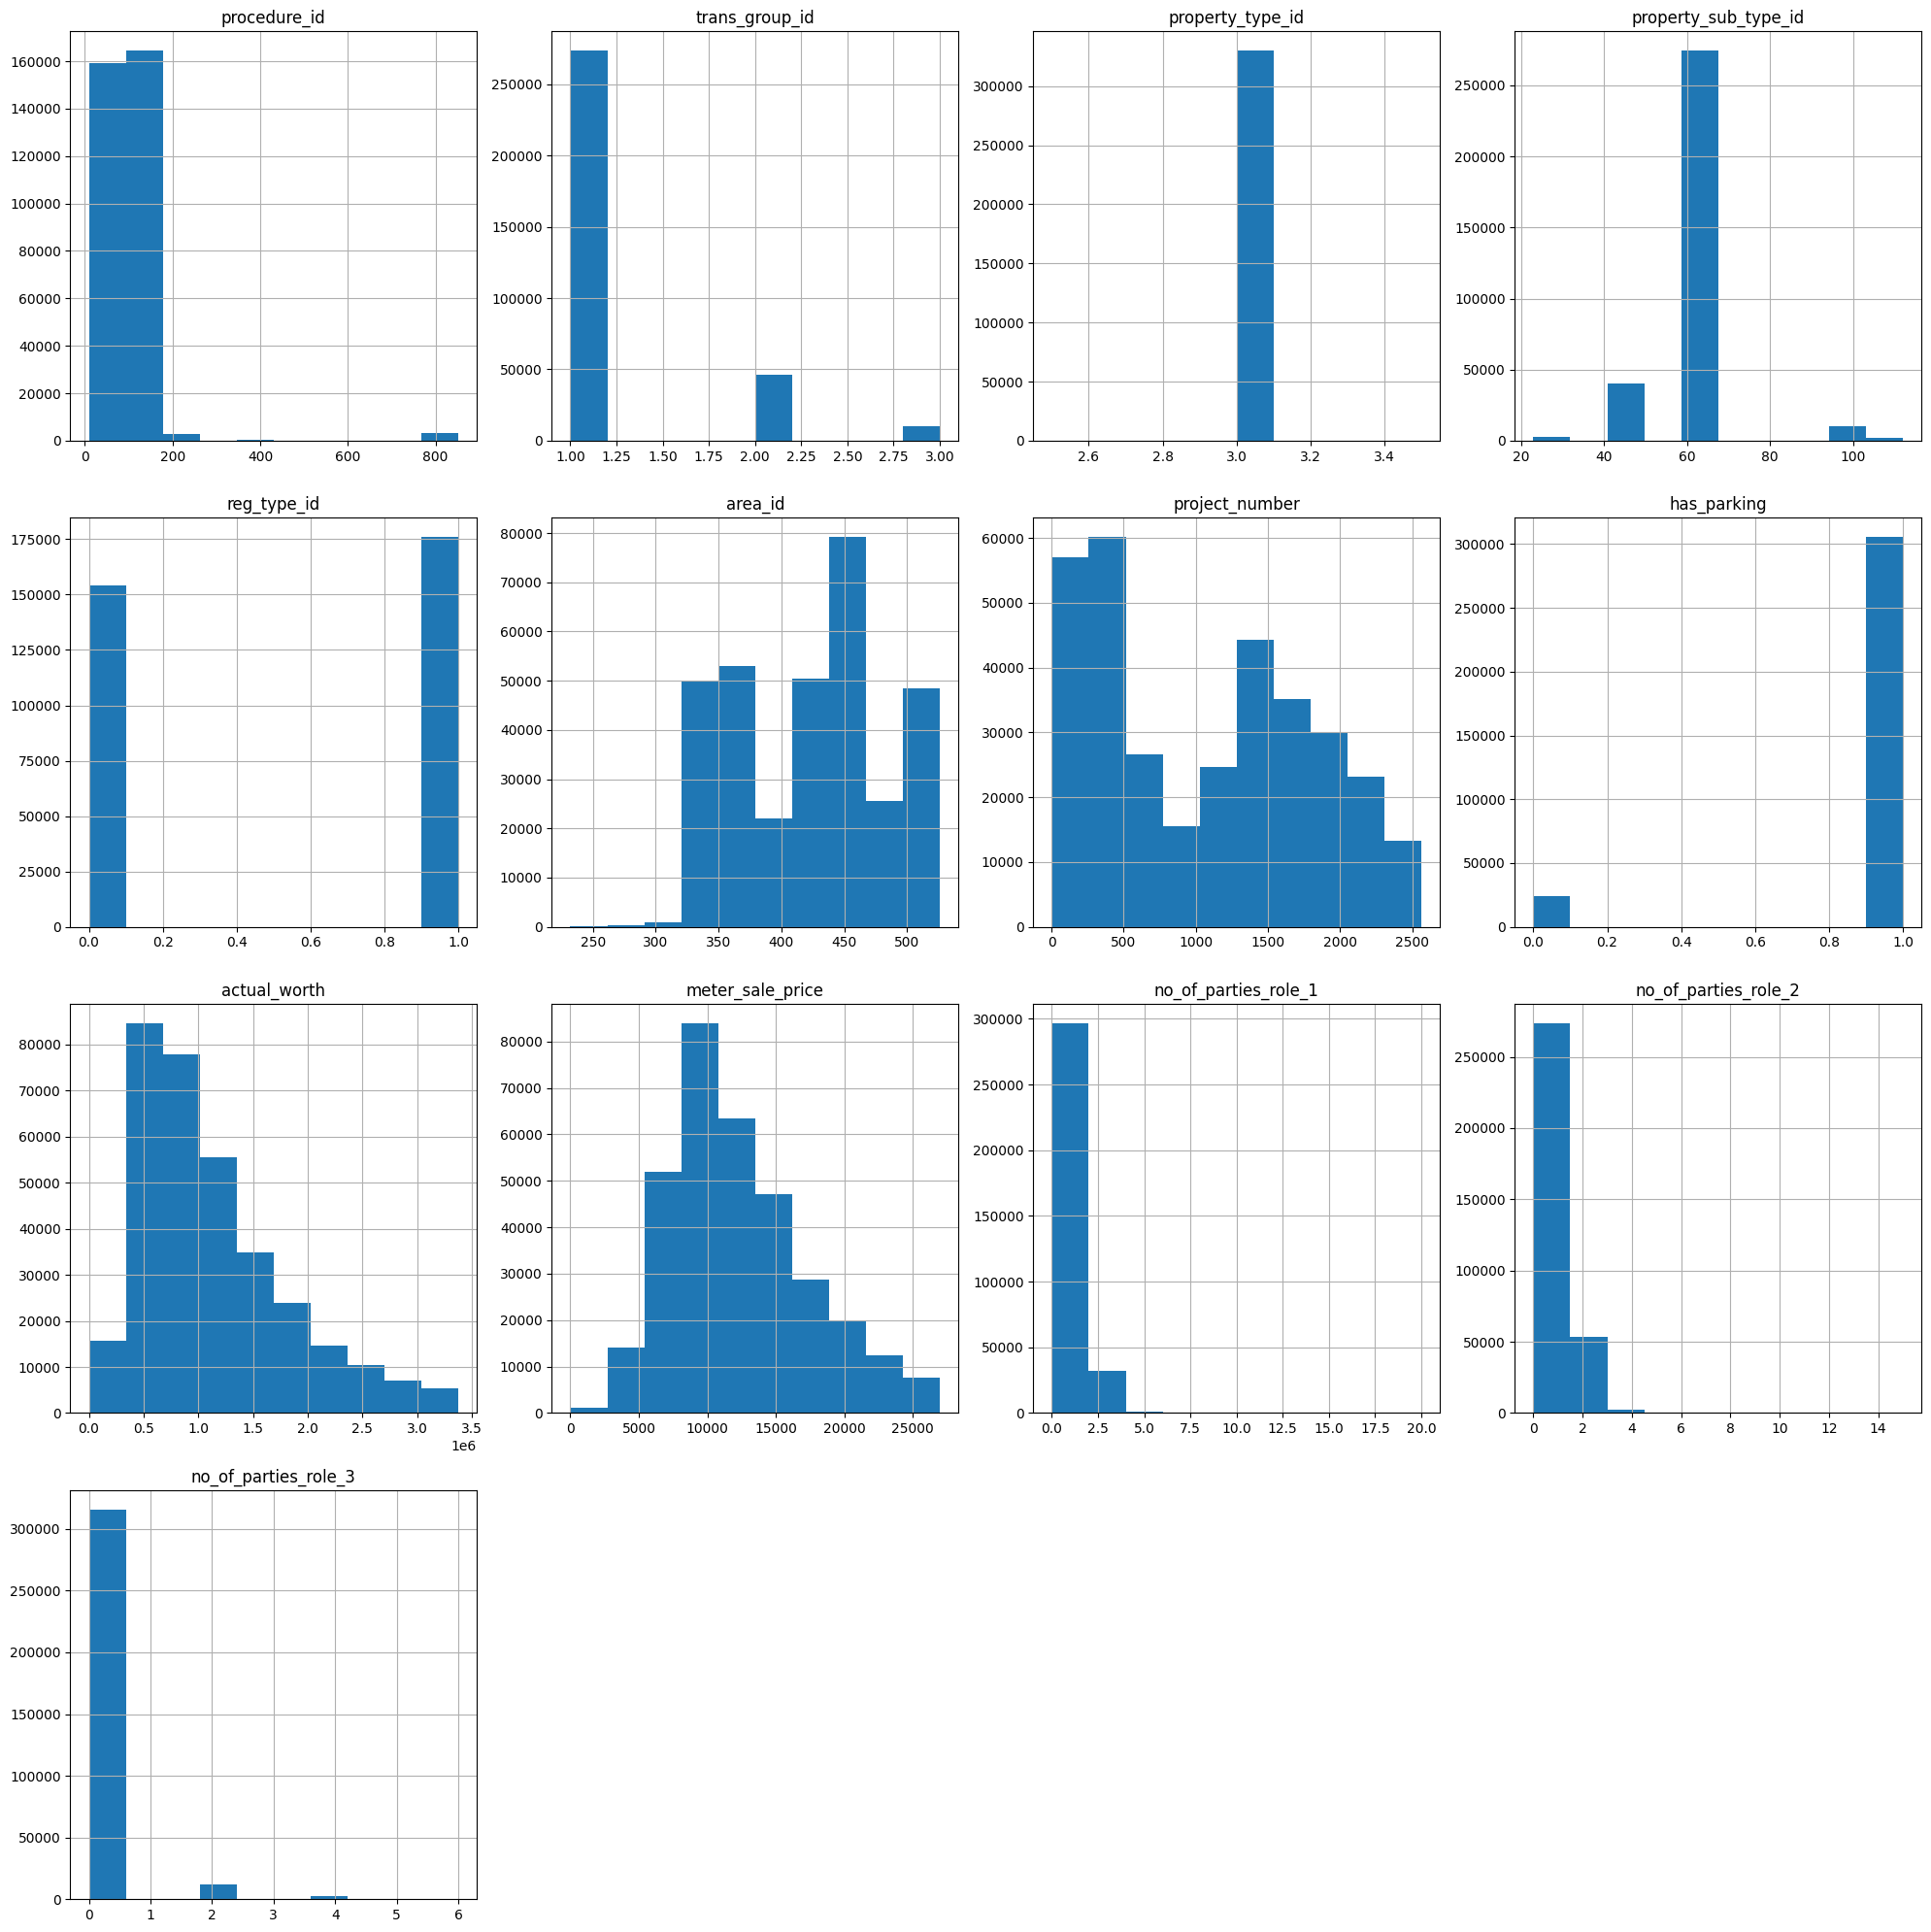

In [116]:
data.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

### Check the correlation between numerical variables

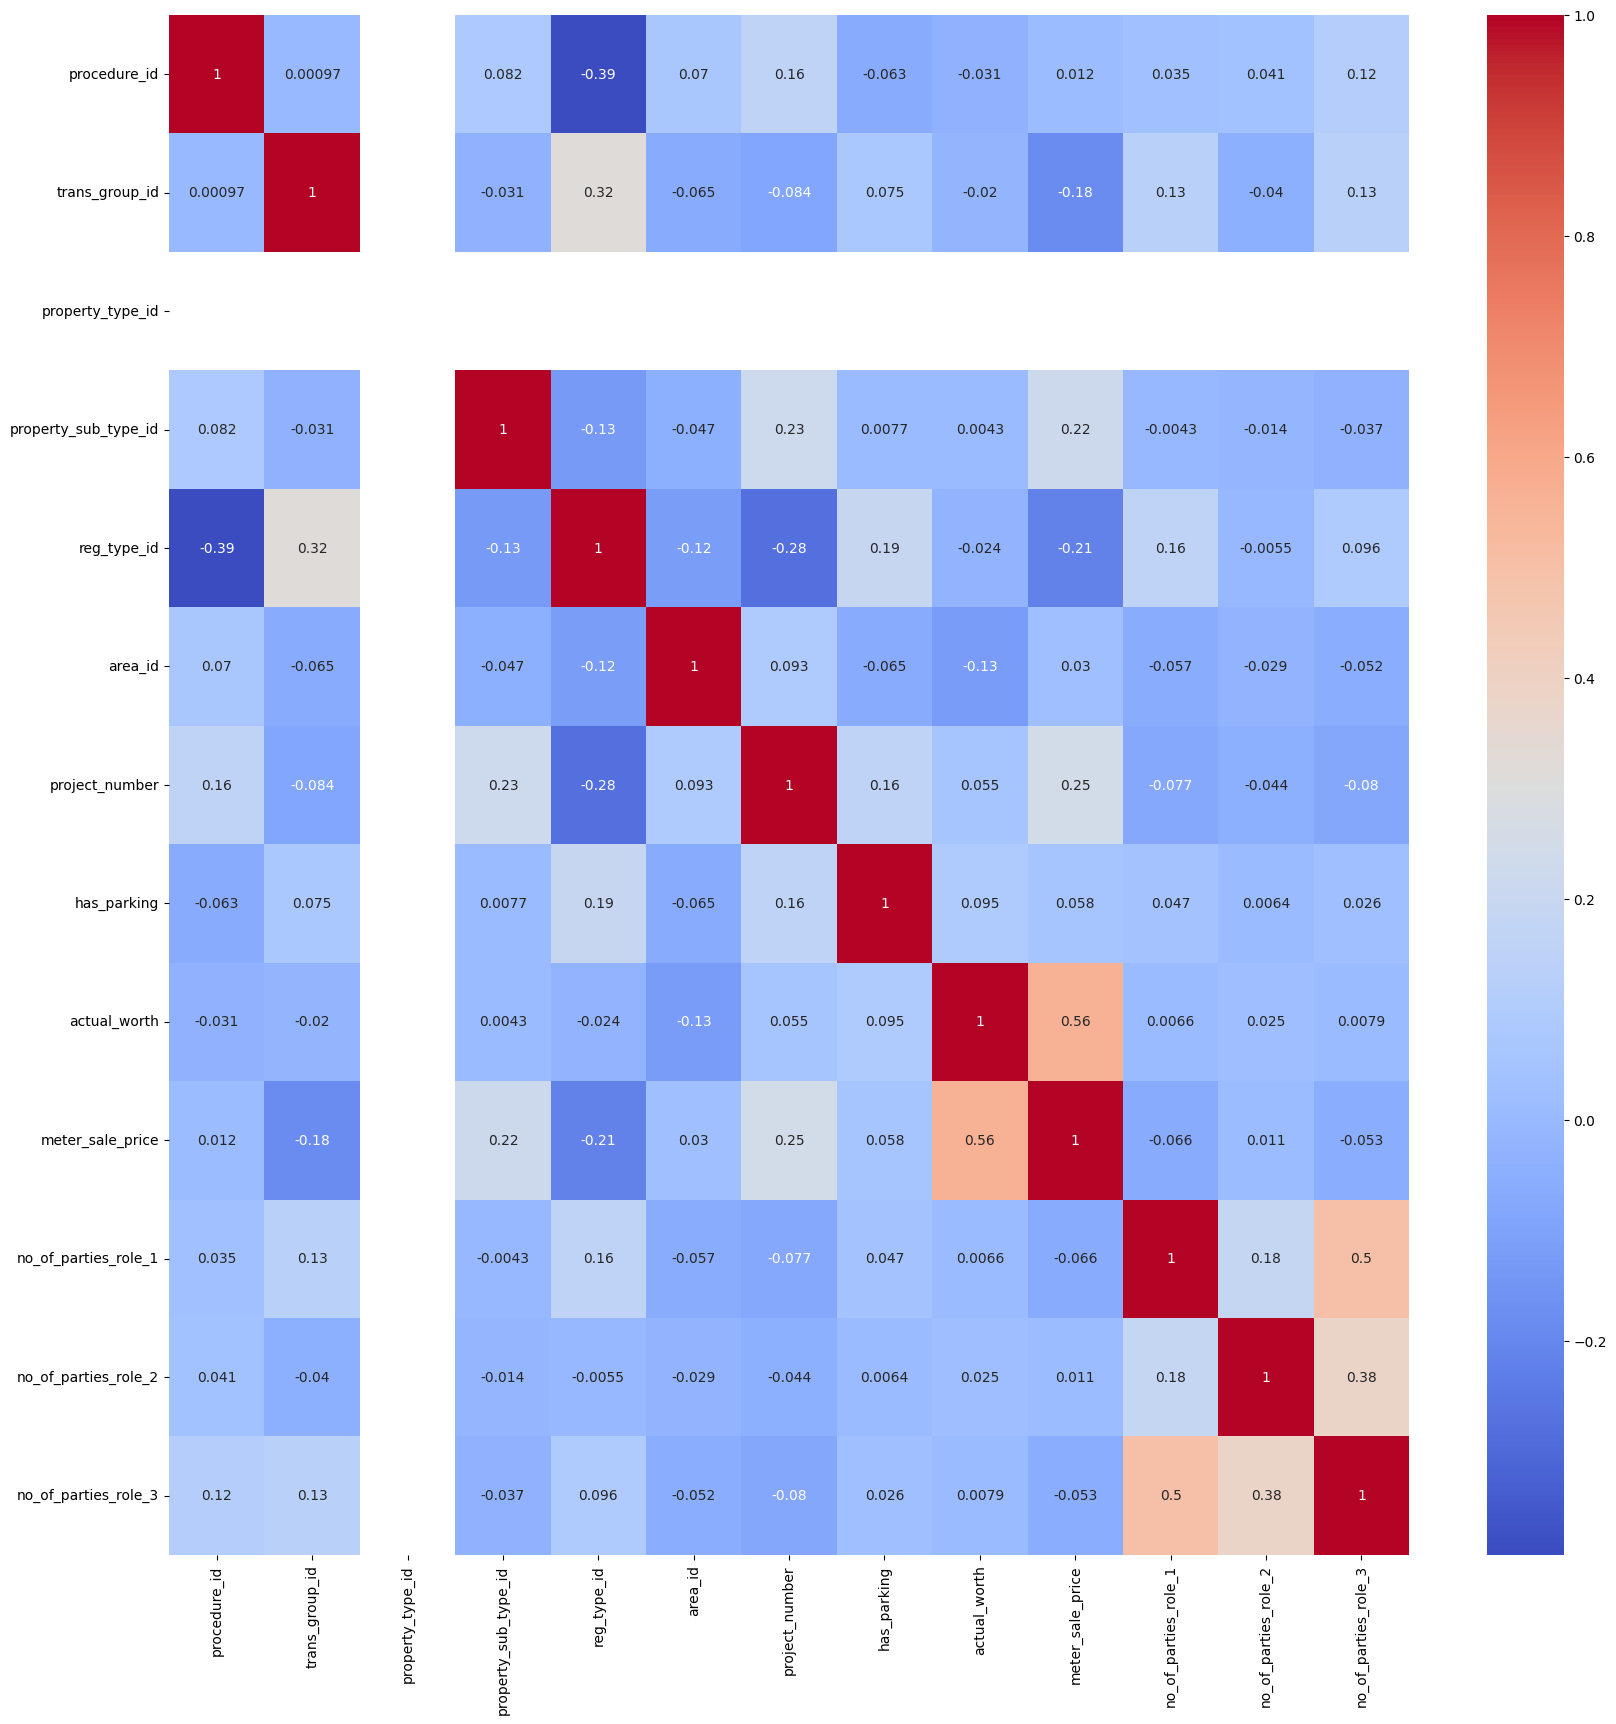

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

### Check the distribution of 'meter_sale_price'

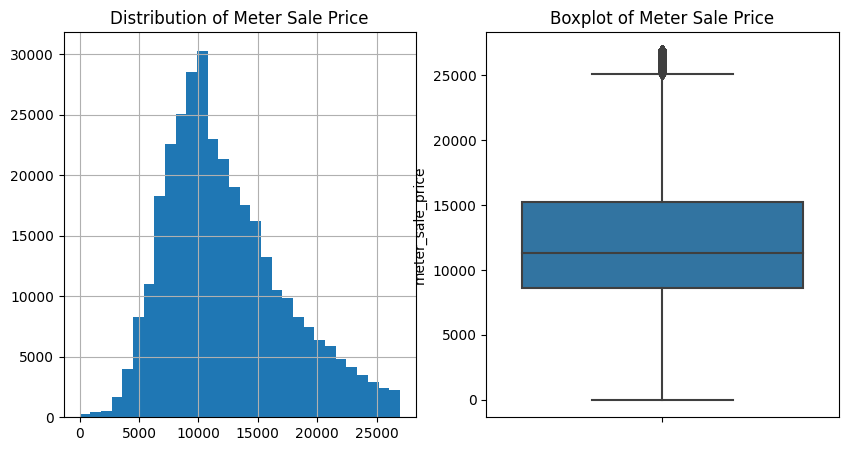

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data['meter_sale_price'].hist(bins=30)
plt.title('Distribution of Meter Sale Price')

plt.subplot(1,2,2)
sns.boxplot(y=data['meter_sale_price'])
plt.title('Boxplot of Meter Sale Price')
plt.show()

### Check if 'has_parking' affects 'meter_sale_price'

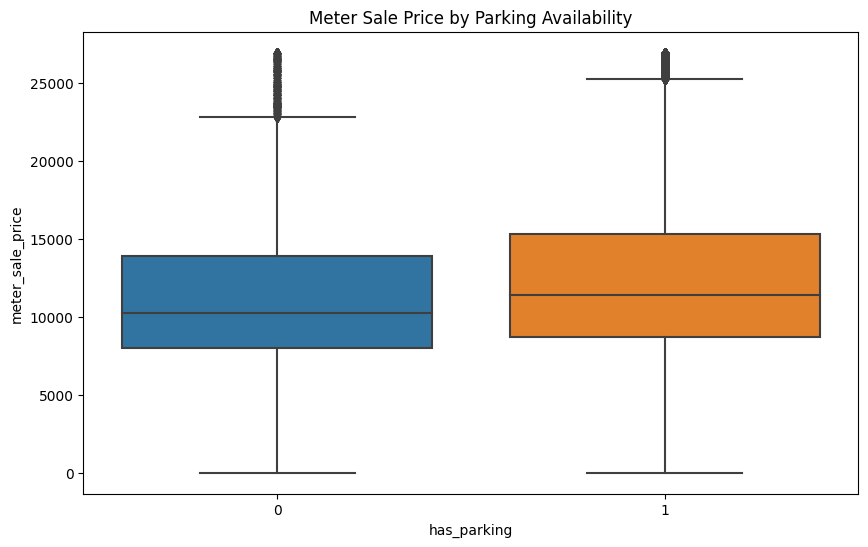

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(x='has_parking', y='meter_sale_price', data=data)
plt.title('Meter Sale Price by Parking Availability')
plt.show()

### Show the average 'meter_sale_price' over time

In [124]:
price_over_time = data.groupby(data['instance_date'].dt.to_period('M'))['meter_sale_price'].mean().reset_index()
price_over_time['instance_date'] = price_over_time['instance_date'].dt.to_timestamp()
px.line(price_over_time, x='instance_date', y='meter_sale_price', title='Change in Average Meter Sale Price Over Time')

### Number of transactions over time

In [125]:
transactions_over_time = data['instance_date'].value_counts().sort_index().reset_index()
transactions_over_time.columns = ['instance_date', 'num_transactions']

px.line(transactions_over_time, x='instance_date', y='num_transactions', title='Number of Transactions Over Time')

### Effect of the number of rooms on meter sale price

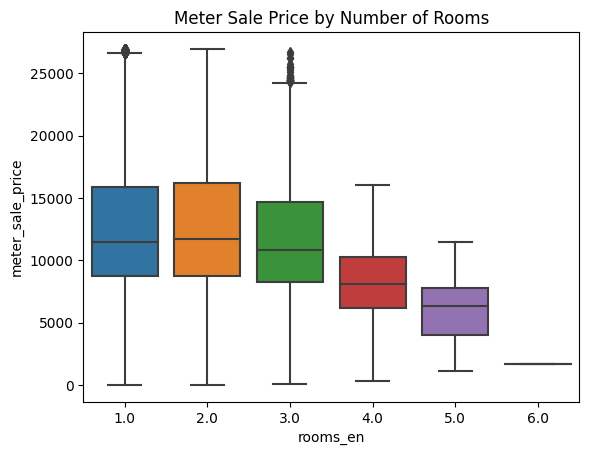

In [128]:
sns.boxplot(x='rooms_en', y='meter_sale_price', data=data)
plt.title('Meter Sale Price by Number of Rooms')
plt.show()

### Count of transactions by property subtype

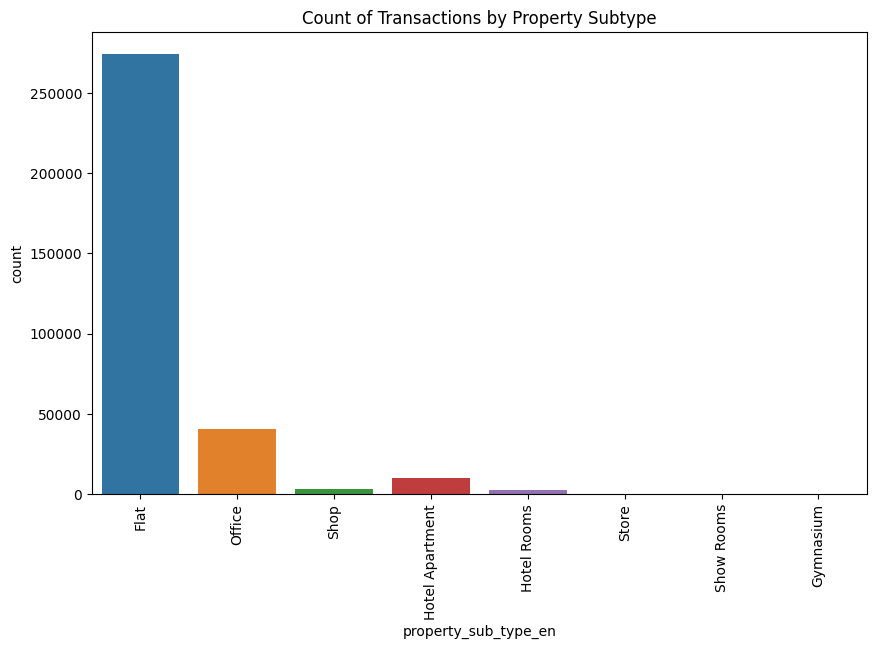

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(x='property_sub_type_en', data=data)
plt.title('Count of Transactions by Property Subtype')
plt.xticks(rotation=90)
plt.show()

### Distribution of 'meter_sale_price'

In [130]:
fig = px.histogram(data, x='meter_sale_price', nbins=30)
fig.update_layout(title='Distribution of Meter Sale Price')
fig.show()

### Let's have a look at the min, max and mean values of meter_sale_price

In [134]:
print('min: ', data['meter_sale_price'].min())
print('max: ', data['meter_sale_price'].max())
print('mean: ', data['meter_sale_price'].mean())

min:  0.01
max:  26962.84
mean:  12297.803759408753


In real estate, a price as low as 0.01 is extremely rare and could indicate a data error, an unusual circumstance (like a sale between family members).

If these low-value properties are not representative of the typical properties you want your model to handle, they could make your model's predictions less accurate. For instance, the model might under-predict prices for typical properties because it's trying to account for the possibility of a very low price. 

To address this issue, I am considering setting a lower limit of 2500 for my target variable, effectively removing any properties priced below 2500 from my dataset. This decision is based on my analysis of the distribution of the target variable, suggesting that prices below 2500 are likely outliers that won't be representative of my typical prediction tasks. 

This strategy can help to make a model more robust and accurate by focusing it on the range of property prices that are most relevant. However, it's worth remembering that any predictions made for properties priced below 2500 will be less reliable, as these properties are no longer represented in your training data.

### Let's change the lower bound of our target

In [137]:
data = data[data['meter_sale_price'] >= 2500]

## Creating and training a model

In [138]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Splitting the data into features (X) and target (y)
X = data.drop('meter_sale_price', axis=1)
y = data['meter_sale_price']

# Identifying categorical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with 8 cores
model = CatBoostRegressor(iterations=2000, loss_function='RMSE', random_seed=42)

# Fit model
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

# Get predictions
preds = model.predict(X_test)

Learning rate set to 0.080024
0:	learn: 4763.0822329	test: 4768.6907194	best: 4768.6907194 (0)	total: 140ms	remaining: 4m 39s
1:	learn: 4565.9213817	test: 4569.3534870	best: 4569.3534870 (1)	total: 205ms	remaining: 3m 24s
2:	learn: 4394.6157175	test: 4394.1059845	best: 4394.1059845 (2)	total: 237ms	remaining: 2m 37s
3:	learn: 4243.5140280	test: 4239.6640477	best: 4239.6640477 (3)	total: 279ms	remaining: 2m 19s
4:	learn: 4107.4392800	test: 4101.5193327	best: 4101.5193327 (4)	total: 337ms	remaining: 2m 14s
5:	learn: 3985.9377714	test: 3977.9375338	best: 3977.9375338 (5)	total: 373ms	remaining: 2m 3s
6:	learn: 3883.2093737	test: 3872.7113801	best: 3872.7113801 (6)	total: 409ms	remaining: 1m 56s
7:	learn: 3787.4501338	test: 3775.9957800	best: 3775.9957800 (7)	total: 456ms	remaining: 1m 53s
8:	learn: 3703.6456701	test: 3689.5956315	best: 3689.5956315 (8)	total: 517ms	remaining: 1m 54s
9:	learn: 3629.0629125	test: 3613.4151805	best: 3613.4151805 (9)	total: 554ms	remaining: 1m 50s
10:	learn: 

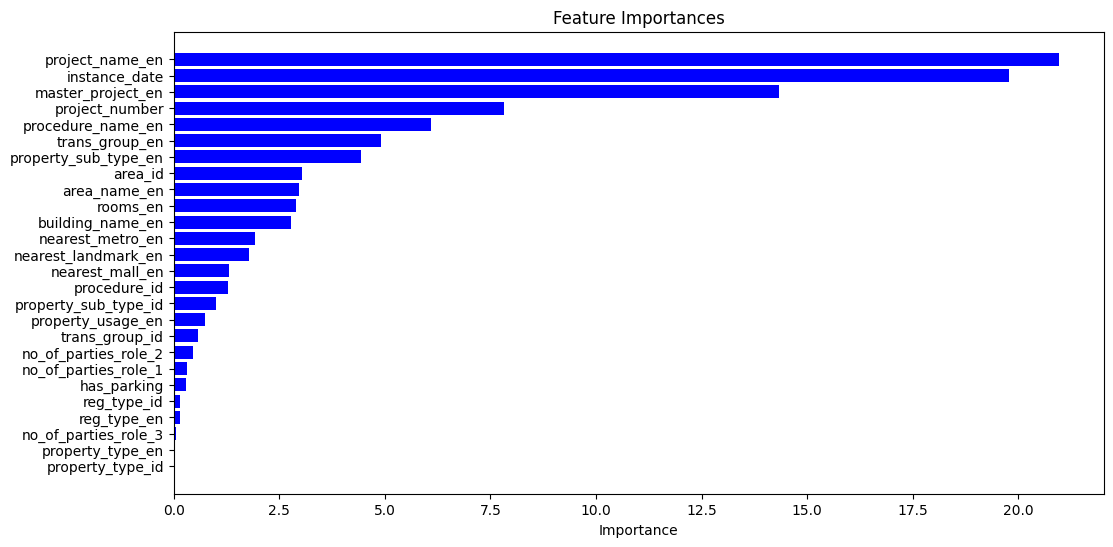

In [139]:
# Get feature importances
feature_importances = model.get_feature_importance()

# Create a pandas DataFrame for easier manipulation
feature_importances_df = pd.DataFrame(list(zip(X.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort values by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 5091972.864355151
RMSE: 2256.540020552516
MAE: 1567.7345157282234
R²: 0.7950608935897571


### Assession of model performance

1. **Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):** The RMSE value is 2283.21. This essentially means that, on average, the model's predictions are approximately 2283.21 units away from the actual values. Given that your target variable has a range from 0.01 to 26962.84, and a mean of 12297.80, this error might be considered somewhat large. However, the evaluation of this largely depends on the specific domain and use case.

2. **Mean Absolute Error (MAE):** This is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The MAE of 1578.53 suggests that, on average, the model's predictions are off by about 1578.53 units. Again, whether this is acceptable or not largely depends on the specific domain and use case.

3. **R-Squared (R²):** The R² score is 0.789, which means approximately 78.9% of the variance in your target variable is explained by your model. In many contexts, this could be considered a good result. An R² score of 1 indicates perfect prediction power, and a score of 0 indicates the model does no better than simply predicting the mean of the target variable for every instance.